# About the Dataset

About Dataset
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1.   'Below College'
2.   'College'
3.   'Bachelor'
4.   'Master'
5.   'Doctor'

EnvironmentSatisfaction
1.   'Low'
2.   'Medium'
3.   'High'
4.   'Very High'

JobInvolvement
1.   'Low'
2.   'Medium'
3.   'High'
4.   'Very High'

JobSatisfaction
1.   'Low'
2.   'Medium'
3.   'High'
4.   'Very High'

PerformanceRating
1.   'Low'
2.   'Good'
3.   'Excellent'
4.   'Outstanding'

RelationshipSatisfaction
1.   'Low'
2.   'Medium'
3.   'High'
4.   'Very High'

WorkLifeBalance
1.   'Bad'
2.   'Good'
3.   'Better'
4.   'Best'

# Importing Libraries 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import (accuracy_score, log_loss, classification_report)
# from imblearn.over_sampling import SMOTE
# import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# from pandas_profiling import ProfileReport

# Loading Data

**Importing Data**

In [ ]:
## upload data set
from google.colab import files
origdf = files.upload()
##prompt

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [ ]:
##make as dataframe
origdf = pd.DataFrame(pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv'))

In [ ]:
pd.set_option('display.max_columns', None)
origdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
origdf.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
origdf.shape

(1470, 35)

In [ ]:
origdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Exploratory Data Analysis

In [ ]:
# Missing values in count & percentage
a=origdf.isnull().sum()
b=round(100*(origdf.isnull().sum()/len(origdf.index)),2)
missing = pd.DataFrame(data=[a,b])
print(missing)

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.0        0.0             0.0        0.0         0.0               0.0   
1  0.0        0.0             0.0        0.0         0.0               0.0   

   Education  EducationField  EmployeeCount  EmployeeNumber  \
0        0.0             0.0            0.0             0.0   
1        0.0             0.0            0.0             0.0   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                      0.0     0.0         0.0             0.0       0.0   
1                      0.0     0.0         0.0             0.0       0.0   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0      0.0              0.0            0.0            0.0          0.0   
1      0.0              0.0            0.0            0.0          0.0   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                 0.0     0.0       0.0   

In [ ]:
# unique values in object columns to check validity of our data
for column in origdf.columns:
    if origdf[column].dtype == object: # checking for only dtype as "object"
        print(f"{column} : {origdf[column].unique()} \n{origdf[column].value_counts()} \n ---------------------------- ")

Attrition : ['Yes' 'No'] 
No     1233
Yes     237
Name: Attrition, dtype: int64 
 ---------------------------- 
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 
 ---------------------------- 
Department : ['Sales' 'Research & Development' 'Human Resources'] 
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 
 ---------------------------- 
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 
 ---------------------------- 
Gender : ['Female' 'Male'] 
Male      882
Female    588
Name: Gender, dtype: int64 
 ---------------------------- 
JobRole : ['Sales Execut

In [ ]:
# unique values in non object columns to check validity of our data
for column in origdf.columns:
    if origdf[column].dtype != object: # checking for dtype excluding "object"
        print(f"{column} : {origdf[column].min()}: {origdf[column].max()}") # checking the minimum & maximum records for each columns

Age : 18: 60
DailyRate : 102: 1499
DistanceFromHome : 1: 29
Education : 1: 5
EmployeeCount : 1: 1
EmployeeNumber : 1: 2068
EnvironmentSatisfaction : 1: 4
HourlyRate : 30: 100
JobInvolvement : 1: 4
JobLevel : 1: 5
JobSatisfaction : 1: 4
MonthlyIncome : 1009: 19999
MonthlyRate : 2094: 26999
NumCompaniesWorked : 0: 9
PercentSalaryHike : 11: 25
PerformanceRating : 3: 4
RelationshipSatisfaction : 1: 4
StandardHours : 80: 80
StockOptionLevel : 0: 3
TotalWorkingYears : 0: 40
TrainingTimesLastYear : 0: 6
WorkLifeBalance : 1: 4
YearsAtCompany : 0: 40
YearsInCurrentRole : 0: 18
YearsSinceLastPromotion : 0: 15
YearsWithCurrManager : 0: 17


In [ ]:
# Checking the properties of numerical variables in our data
origdf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# check our target is balanced or imbalanced data
origdf['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Data Visualization 

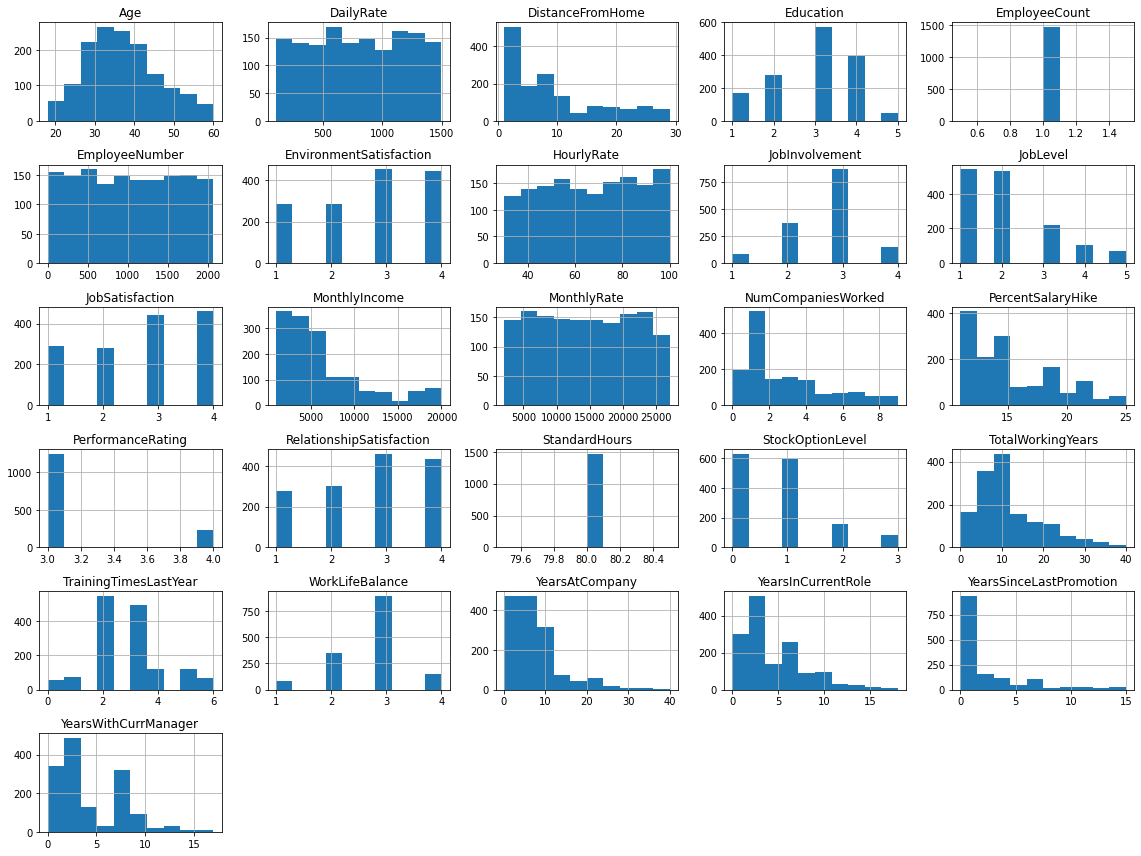

In [ ]:
# Let's see the distrubtion of all numeric variables
origdf.hist(figsize=(16,12))
plt.tight_layout()

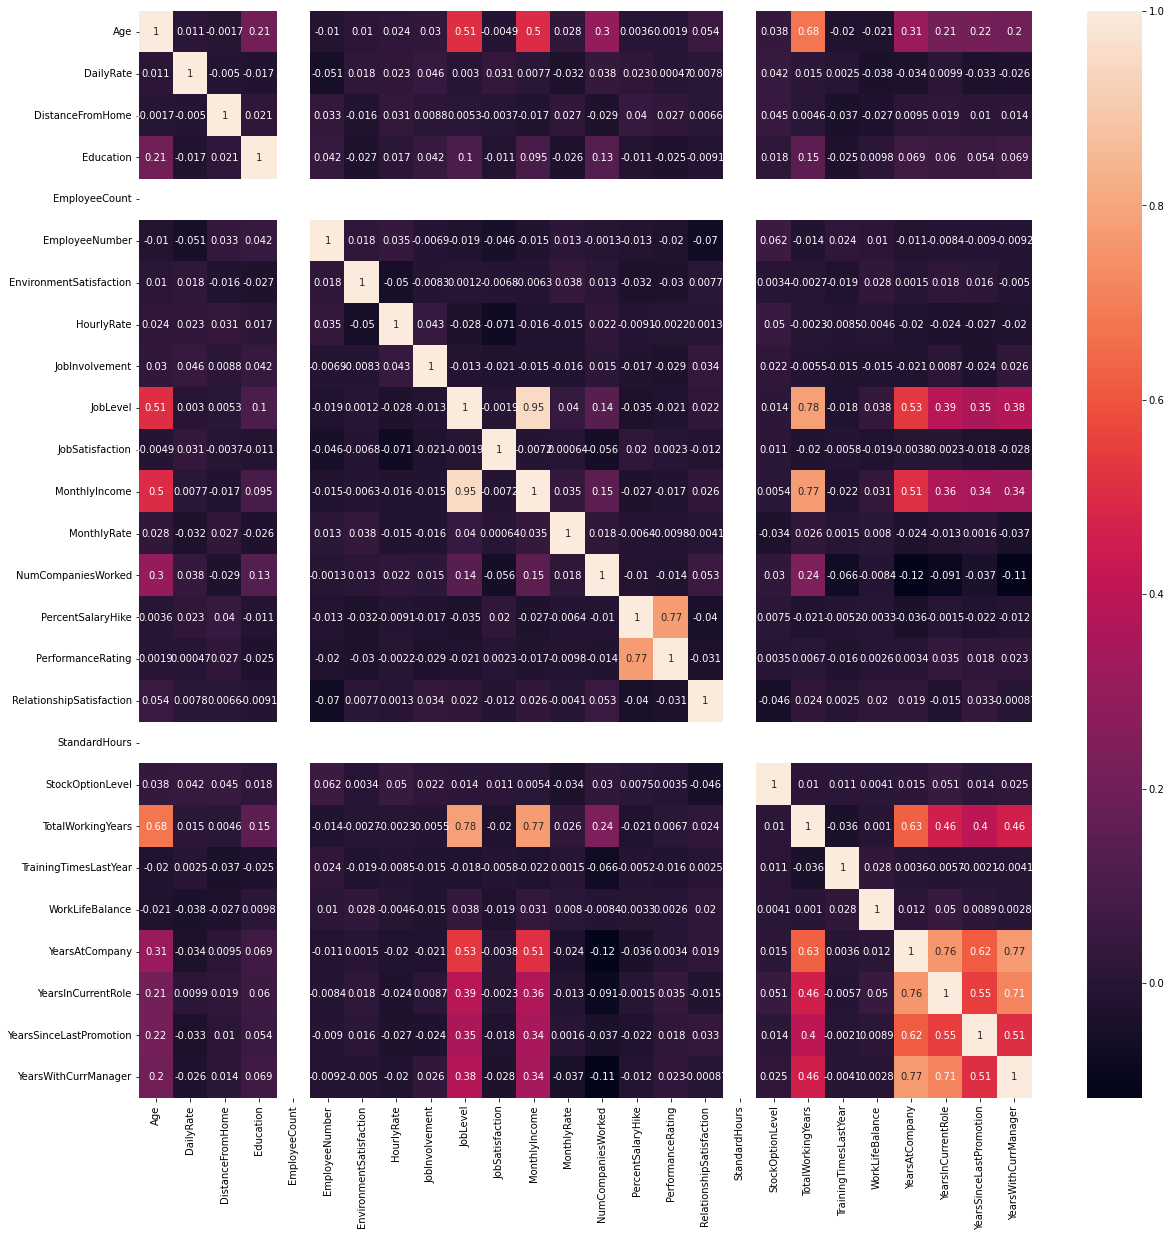

In [ ]:
# let's see the correlation between the features
plt.subplots(figsize = (20, 20))
sns.heatmap(origdf.corr(), annot = True)

columns: ['EmployeeCount' , 'Over18' , 'StandardHours']

are of no value because these remain the same for all employees, so we will not consider them in our analysis. Same can be dropped while creating the model.

### Ratio between Male & Female and effect of Attrition

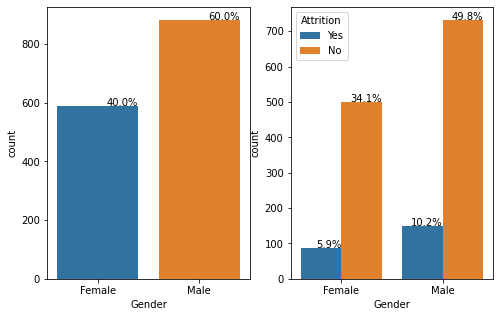

In [ ]:
plt.figure(figsize=(8,5))
total = float(len(origdf))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=origdf)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.subplot(1,2,2)
ax = sns.countplot(x="Gender", hue="Attrition", data=origdf)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

*   The ratio between numbers of males and females in the company are 1.5.
*   Approximately 6%, 10% of females and males respectively left the company.
*   The number of males which likely to leave the firm more than number of female.

### Employee Age and effect of Attrition

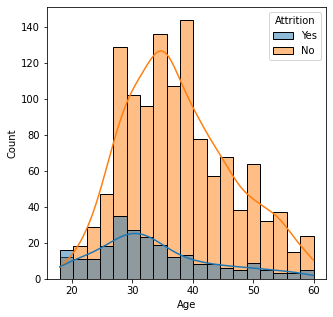

In [ ]:
plt.figure(figsize = (5, 5))
sns.histplot(x = 'Age', hue = 'Attrition', data = origdf , kde=True )



*   The distribution of the age variable looks almost a bell-curved (Normal Distribution) where the median/mean are closely equal around the center.
*   The majority of employee are between 28 - 36 years old, while the range of age are 18 - 60.
*   The Company seems to be highly depended on segment of employees younger than 40 years old.
*   we can identify a close pattern where younger employees had higher chance of attrition up to around 35.



### Distance from home and effect of Attrition

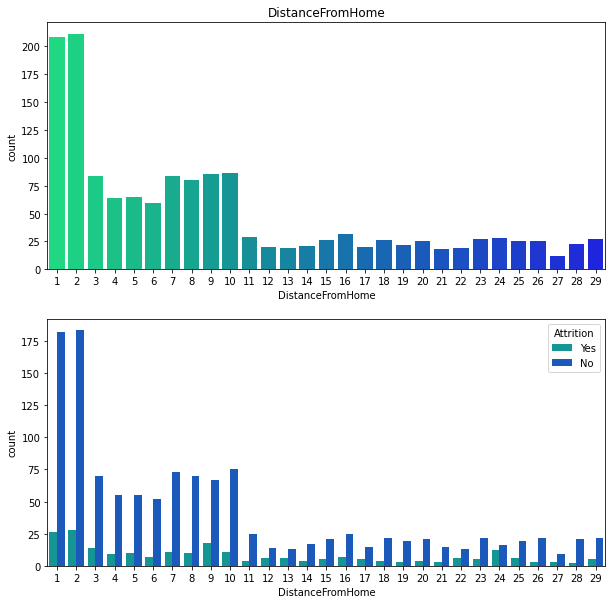

In [ ]:
plt.figure(figsize = (10 , 10))
plt.subplot(2 ,1,1)
sns.countplot(x= 'DistanceFromHome' ,data =origdf ,palette='winter_r')
plt.title('DistanceFromHome')
plt.subplot(2,1,2)
sns.countplot(x= 'DistanceFromHome' ,data = origdf ,palette='winter_r'  ,hue =origdf['Attrition'])

*   the most of our employees have a distance from home in range(1-10 km)
*   we can notice that more employees tend to leave when the distance from home is more than 10 km



### Effect of Education on Attrition

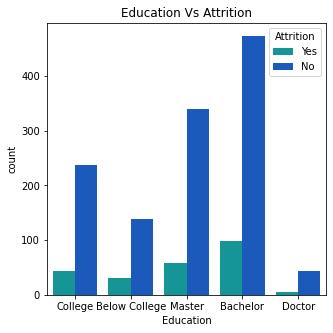

In [ ]:
plt.figure(figsize=(5,5))
origdf['Education'] = origdf['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctor'])
sns.countplot(x= 'Education' ,data =origdf ,palette='winter_r',hue='Attrition')
plt.title('Education Vs Attrition')
plt.show()

The employee of Bachelor degree tends to leave company than the people have any other degrees.

### Effect of Marital status on Attrition

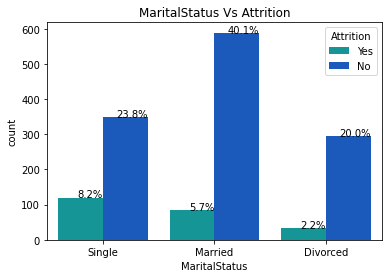

In [ ]:
ms=sns.countplot(x= 'MaritalStatus' ,data =origdf ,palette='winter_r',hue='Attrition')
plt.title('MaritalStatus Vs Attrition')
for p in ms.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ms.annotate(percentage, (x, y),ha='right')

plt.show()

The employee whose status labeled single have clear indication to leave the company, while the others who are married tend to be stable.

### Effect of Environment Satisfaction, Job Satisfaction, Job Involvement, Performance Rating, Relationship satisfaction and Worklife Balance on Attrition


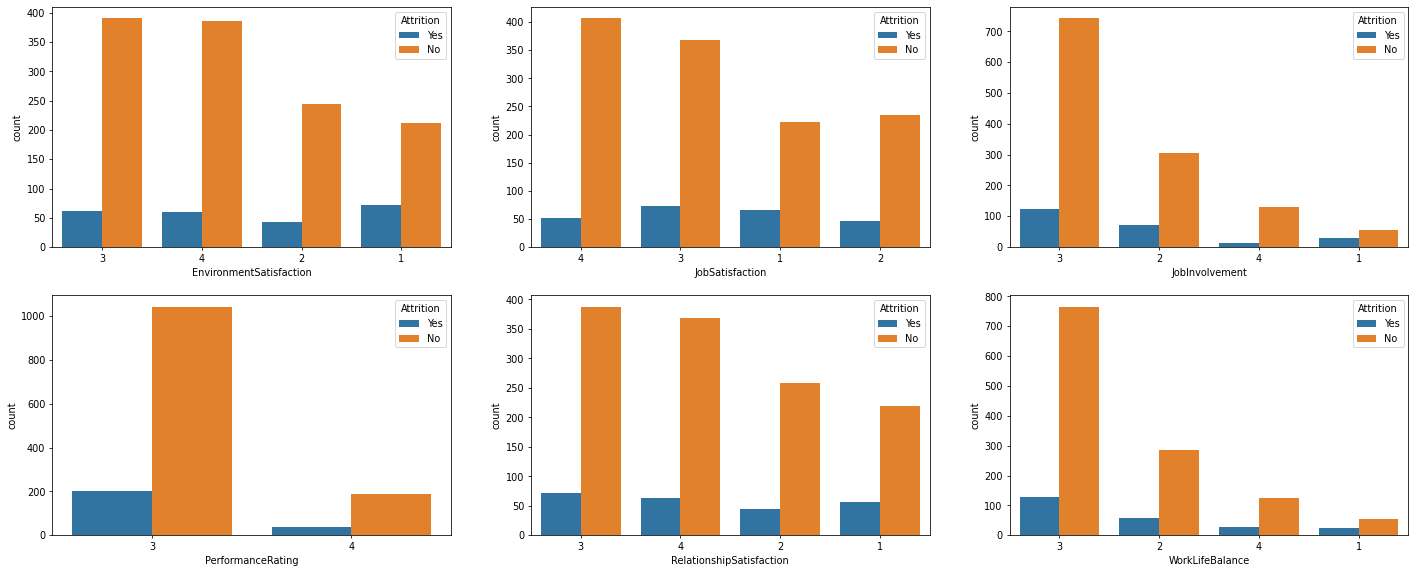

In [ ]:
plt.figure(figsize=(25,10), dpi=70)

plt.subplot(2,3,1)
sns.countplot(data=origdf, x='EnvironmentSatisfaction', hue='Attrition', 
              order = origdf['EnvironmentSatisfaction'].value_counts().index)

plt.subplot(2,3,2)
sns.countplot(data=origdf, x='JobSatisfaction', hue='Attrition', 
              order = origdf['JobSatisfaction'].value_counts().index)

plt.subplot(2,3,3)
sns.countplot(data=origdf, x='JobInvolvement', hue='Attrition', 
              order = origdf['JobInvolvement'].value_counts().index)

plt.subplot(2,3,4)
sns.countplot(data=origdf, x='PerformanceRating', hue='Attrition', 
              order = origdf['PerformanceRating'].value_counts().index)

plt.subplot(2,3,5)
sns.countplot(data=origdf, x='RelationshipSatisfaction', hue='Attrition', 
              order = origdf['RelationshipSatisfaction'].value_counts().index)

plt.subplot(2,3,6)
sns.countplot(data=origdf, x='WorkLifeBalance', hue='Attrition', 
              order = origdf['WorkLifeBalance'].value_counts().index)

* The performance rating for the employees have been very good.
* For the employees who didn't leave the organisation, the Job, Relationship, Environment satisfaction where largely above 3.
* For the most employees have Work-Life Balance, Job Statification where largely above 3
* For the most who left the organisation, whose overall work-life balance in level 3

### Effect of Attrition Department wise

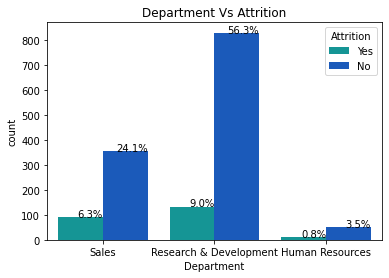

In [ ]:
ms=sns.countplot(x= 'Department' ,data =origdf ,palette='winter_r',hue='Attrition')
plt.title('Department Vs Attrition')
for p in ms.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ms.annotate(percentage, (x, y),ha='right')

plt.show()

* The ratio of Attrition in R&D Department is 9% compared to HR & sales department

### Effect of Hourly, Daily & Monthly Rate on Attrition



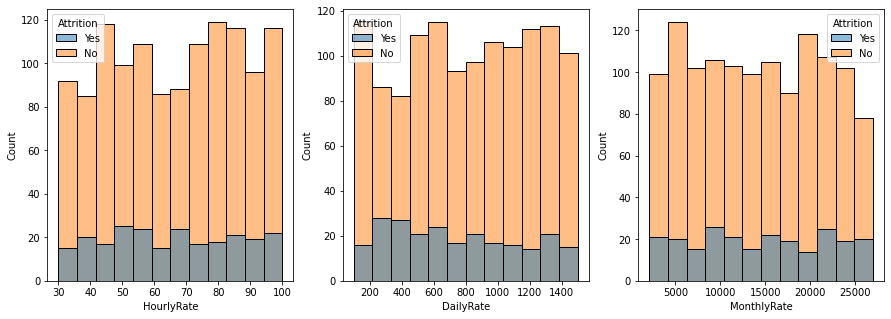

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(x= 'HourlyRate' ,data = origdf ,hue='Attrition')

plt.subplot(1,3,2)
sns.histplot(x= 'DailyRate' ,data = origdf ,hue='Attrition')

plt.subplot(1,3,3)
sns.histplot(x= 'MonthlyRate' ,data = origdf ,hue='Attrition')

plt.show()

### Effect of Stock Option on Attrition




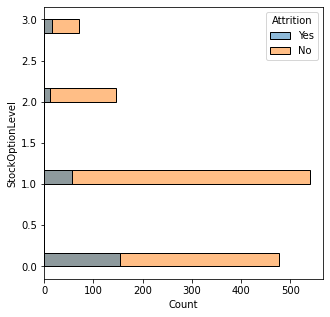

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(y= 'StockOptionLevel' ,data = origdf ,hue='Attrition' )
plt.show()

### Effect of Monthly Income on  & Education





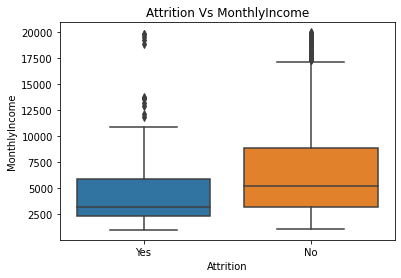

In [ ]:
plt.title('Attrition Vs MonthlyIncome')
sns.boxplot(x=origdf['Attrition'],y=origdf['MonthlyIncome'])
plt.show()

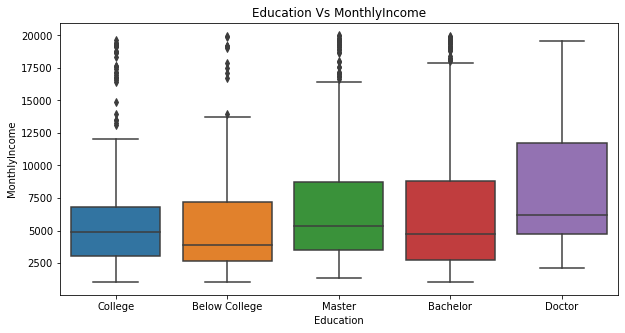

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Education Vs MonthlyIncome')
sns.boxplot(x=origdf['Education'],y=origdf['MonthlyIncome'])
plt.show()

### Effect of Years since last promotion on Attrition


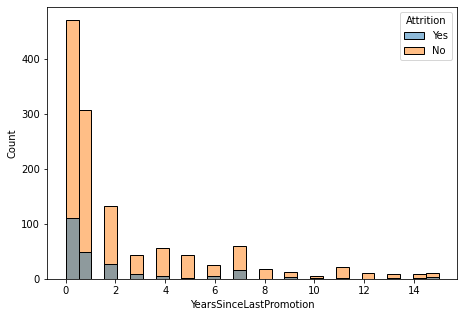

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(x= 'YearsSinceLastPromotion' ,data = origdf ,hue='Attrition')

### Effect of Salary Hike on Attrition

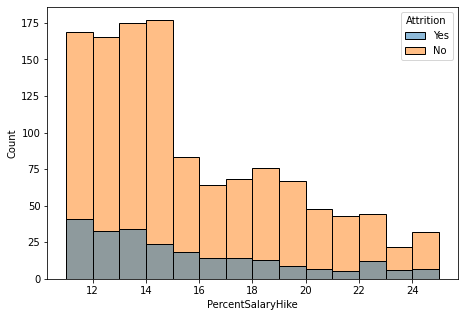

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(x= 'PercentSalaryHike' ,data = origdf ,hue='Attrition')

### Effect of Years since last promotion on Attrition


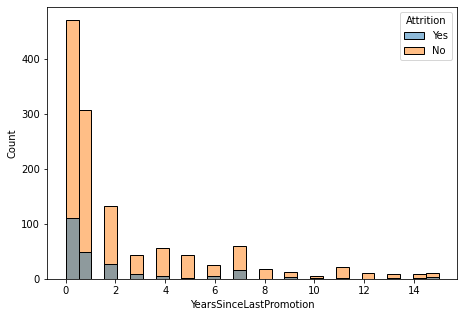

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(x= 'YearsSinceLastPromotion' ,data = origdf ,hue='Attrition')

# What we learned from the data?

*   Males have a higher rate of attrition.
*   Females are earning a little higher than males.
*   Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role.
*   Young professionals are more likely to leave the firm.
*   Sales Representative tends to leave more other roles because they have lower income compared with other roles.
*   As the level of education increases , average monthly income increases.
*   More employees tend to leave when the distance from home is more than 10 km.
*   Single employees tends to leave because they have low MonthlyIncome compared by other.
*   An innovative structure needs to be implemented for employees with 1 year of experience as it is majorly contributing to the attrition %
*   Drop in income for Employees having 15 years of Experience in the company.
*   Need to come up with better stock options for people with more than 6+ years in Current Role as attrition seems to increase gradually with a drop in monthly income.
*   Employees are dissatisfied with the environment conditions and JobSatisfaction tend to leave more compared with other.
*   to avoid attrition, the company have to:
 1. Fairly pay employees at the same job level , same job involvement , same job role with almost equal monthly income and stocks . 
 2. Offer stock options to more employees especially new recruits as an incentive . 
 3. Increase allowance for employees to work overtime , and make sure that those working overtime are being paid more than those who are not. 
 4. companies should remember to appreciate their employees and work on the harmonic balance of their company.
At the end, we have seen strong features that could determine employees' attrition such as (Over Time, Distance From Home, Years Since Last Promotion)

# Feature Engineering

In [ ]:
# Creating a copy of original dataframe
df = origdf.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Dropping unwanted variables from the dataset

In [ ]:
#Dropping variables which are same for all the employees also will not have any contribution towards model creation.
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
df.columns # check if the columns are dropped from the dataframe

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Identifying and converting "object" dtypes variable into numerical variable with the help of LabelEncoder from sklearn

In [ ]:
df.dtypes==object

Age                         False
Attrition                    True
BusinessTravel               True
DailyRate                   False
Department                   True
DistanceFromHome            False
Education                    True
EducationField               True
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                      True
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [ ]:
# Variable created with "Colname" to convert the required "object" category data into "numerical"  category for model
colname_object = ['BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','OverTime']
colname_object

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
# For preprocessing the data (Label encoder will convert "object" into "numerical" category)
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for x in colname_object:
    df[x]=le.fit_transform(df[x])

In [ ]:
# Converted target variable into numerical
df['Attrition'] = df.Attrition.astype("category").cat.codes # Attrition Yes=1, No=0

In [ ]:
df.dtypes

Age                         int64
Attrition                    int8
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

## Creating 'X' as independent variables whereas 'Y' as target/dependent variable and scaling the data with the help of StandardScaler from sklearn.preprocessing

In [ ]:
X=df.drop(['Attrition'],1)
Y=df['Attrition']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 0.4463504   0.59004834  0.74252653 ... -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521 -0.91319439 -1.2977746  ...  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343    0.59004834  1.41436324 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-1.08667552  0.59004834 -1.60518328 ... -0.61549158 -0.67914568
  -0.31487349]
 [ 1.32236521 -0.91319439  0.54667746 ...  0.48889978 -0.67914568
   1.08689522]
 [-0.32016256  0.59004834 -0.43256792 ... -0.33939374 -0.36871529
  -0.59522723]]


## Creating 'X' as independent variables whereas 'Y' as target/dependent variable 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_train', y_test.shape)

X_train (1029, 30)
X_test (441, 30)
y_train (1029,)
y_train (441,)


## Model Creation

### 1. Decision Tree (base model)

In [ ]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

DTmodel=DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=6, max_leaf_nodes=10,
                                          random_state=10)

#fit the model on the data and predict the values
DTmodel.fit(X_train,y_train)
y_pred=DTmodel.predict(X_test)
# print(y_pred)
#print(list(zip(y_test,y_pred)))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
##Confusion Matrix to predict ([True Positive, False Positive
                                #False Negative, True Negative])
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[366   5]
 [ 57  13]]
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       371
           1       0.72      0.19      0.30        70

    accuracy                           0.86       441
   macro avg       0.79      0.59      0.61       441
weighted avg       0.84      0.86      0.82       441

Accuracy of the model:  0.8594104308390023


### 2. Random Forest Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 5)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [ ]:
##Confusion Matrix to predict ([True Positive, False Positive
                                #False Negative, True Negative])
coma = confusion_matrix(y_test, y_pred)
print(coma)

[[366   5]
 [ 57  13]]


In [ ]:
accuracy_score(y_test, y_pred)

0.8594104308390023

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       371
           1       0.72      0.19      0.30        70

    accuracy                           0.86       441
   macro avg       0.79      0.59      0.61       441
weighted avg       0.84      0.86      0.82       441



### 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression()

LRmodel.fit(X_train, y_train)

y_pred = LRmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
##Confusion Matrix to predict ([True Positive, False Positive
                                #False Negative, True Negative])
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[363   8]
 [ 44  26]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.76      0.37      0.50        70

    accuracy                           0.88       441
   macro avg       0.83      0.67      0.72       441
weighted avg       0.87      0.88      0.86       441

Accuracy of the model:  0.8820861678004536


### 4. Gradient Booster

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBreg = GradientBoostingClassifier(random_state=20)
GBreg.fit(X_train, y_train)

y_pred=GBreg.predict(X_test)

In [ ]:
##Confusion Matrix to predict ([True Positive, False Positive
                                #False Negative, True Negative])                        
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

[[360  11]
 [ 44  26]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       371
           1       0.70      0.37      0.49        70

    accuracy                           0.88       441
   macro avg       0.80      0.67      0.71       441
weighted avg       0.86      0.88      0.86       441

Accuracy of the model:  0.8752834467120182


# Thank You.....!